In [72]:
import numpy       as np
import pandas      as pd
import scipy.stats as stats

In [73]:
from scipy.stats             import ttest_1samp,ttest_ind, wilcoxon
from statsmodels.stats.power import ttest_power
import matplotlib.pyplot     as     plt
import os


In [74]:
os.getcwd()

'/Users/rahul/Documents/GitHub/Great_learning_data_science/statistical_method_for_decision_making/Stats Mini Project'

In [75]:
df=pd.read_csv('Laliga.csv')


In [77]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1


In [78]:
df[:1].values[0][1]

'Team'

In [79]:
str(df.columns.values[0])

'Unnamed: 0'

In [80]:
df.columns.values

array(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19'],
      dtype=object)

In [81]:
df.shape[1]

20

In [82]:
for i in range(0,20):
    df.rename(columns={str(df.columns.values[i]):str(df[:1].values[0][i])},inplace=True)

In [83]:
df.drop(labels=0,inplace=True)

In [84]:
df.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
5,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


In [86]:
df['Debut']

1        1929
2        1929
3        1929
4     1931-32
5        1929
6     1934-35
7        1929
8        1929
9     1939-40
10    1932-33
11    1941-42
12    1939-40
13    1948-49
14       1929
15    1944-45
16    1935-36
17    1949-50
18    1933-34
19    1960-61
20    1951-52
21    1998-99
22    1941-42
23    1977-78
24    1959-60
25    2004-05
26    1935-36
27    1961-62
28    1940-41
29    1930-31
30    1963-64
       ...   
32    1943-44
33    1977-78
34    1987-88
35    1941-42
36    1991-92
37    2007-08
38    1962-63
39    1994-95
40    1978-79
41    1971-72
42    1963-64
43    1999-00
44    2014-15
45       1929
46    1990-91
47    1947-48
48    1996-97
49    1995-96
50    1945-46
51    1953-54
52       1929
53    1979-80
54       1929
55    1950-51
56    2016-17
57    2009-10
58    1956-57
59    1951-52
60    1955-56
61    2017-18
Name: Debut, Length: 61, dtype: object

# 1.	Which are the teams which started playing between 1930-1980?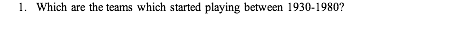

In [89]:
df['Debut']=df['Debut'].apply(lambda x:int(x[0:4]))

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 1 to 61
Data columns (total 20 columns):
Pos              61 non-null object
Team             61 non-null object
Seasons          61 non-null object
Points           61 non-null object
GamesPlayed      61 non-null object
GamesWon         61 non-null object
GamesDrawn       61 non-null object
GamesLost        61 non-null object
GoalsFor         61 non-null object
GoalsAgainst     61 non-null object
Champion         61 non-null object
Runner-up        61 non-null object
Third            61 non-null object
Fourth           61 non-null object
Fifth            61 non-null object
Sixth            61 non-null object
T                61 non-null object
Debut            61 non-null int64
Since/LastApp    61 non-null object
BestPosition     61 non-null object
dtypes: int64(1), object(19)
memory usage: 10.0+ KB


In [98]:
df2=df[((df['Debut'])>1930)
      &((df['Debut'])>1980)]

In [99]:
df2['Debut']

21    1998
25    2004
34    1987
36    1991
37    2007
39    1994
43    1999
44    2014
46    1990
48    1996
49    1995
56    2016
57    2009
61    2017
Name: Debut, dtype: int64

In [101]:
df2['Team']

21     Villarreal
25         Getafe
34       Logrones
36       Albacete
37        Almeria
39     Compostela
43       Numancia
44          Eibar
46    Real Burgos
48    Extremadura
49         Merida
56        Leganes
57          Xerez
61         Girona
Name: Team, dtype: object

# 3.	What is the distribution of the winning percentage for all teams? Which teams are in the top 5 in terms of winning percentage? (Winning percentage= (GamesWon / GamesPlayed)*100)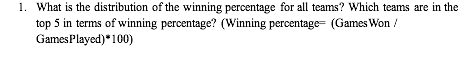

In [15]:
df['GamesWon'].replace('-',0,inplace=True)
df['GamesPlayed'].replace('-',0,inplace=True)


In [16]:
df2=df.copy()

In [17]:
df2['GamesWon']=pd.to_numeric(df2['GamesWon'])

In [18]:
df2['GamesPlayed']=pd.to_numeric(df2['GamesPlayed'])

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 1 to 61
Data columns (total 20 columns):
Pos              61 non-null object
Team             61 non-null object
Seasons          61 non-null object
Points           61 non-null object
GamesPlayed      61 non-null int64
GamesWon         61 non-null int64
GamesDrawn       61 non-null object
GamesLost        61 non-null object
GoalsFor         61 non-null object
GoalsAgainst     61 non-null object
Champion         61 non-null object
Runner-up        61 non-null object
Third            61 non-null object
Fourth           61 non-null object
Fifth            61 non-null object
Sixth            61 non-null object
T                61 non-null object
Debut            61 non-null object
Since/LastApp    61 non-null object
BestPosition     61 non-null object
dtypes: int64(2), object(18)
memory usage: 10.0+ KB


In [20]:
df2['per_win']=(df2['GamesWon']/df2['GamesPlayed'])*100

In [22]:
df2['per_win'].head()

1    59.630702
2    57.241130
3    47.475134
4    44.557057
5    43.772629
Name: per_win, dtype: float64

In [29]:
df2.sort_values(by='per_win',ascending=False)[['Team','per_win']].head(
)

,Team,per_win
1,Real Madrid,59.630702
2,Barcelona,57.241130
3,Atletico Madrid,47.475134
4,Valencia,44.557057
5,Athletic Bilbao,43.772629


In [30]:
df2.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,...,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition,per_win
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,...,23,8,8,3,4,79,1929,1929,1,59.630702
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,...,25,12,12,4,6,83,1929,1929,1,57.241130
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,...,8,16,9,7,6,56,1929,2002-03,1,47.475134
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,...,6,10,11,10,7,50,1931-32,1987-88,1,44.557057
5,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,...,7,10,5,8,10,49,1929,1929,1,43.772629


In [46]:
df2.groupby('Pos').agg({'per_win':'mean'}).head()


,per_win
Pos,
1,59.630702
10,35.069444
11,36.797386
12,34.511190
13,31.582538


# 4.	Is there a significant difference in the winning percentage for teams which have attained a best position between 1-3 and those teams which have had a best position between 4-7.

In [48]:
df3=df2[(df2['Pos']=='1')|
       (df2['Pos']=='2')|
       (df2['Pos']=='3')|
       (df2['Pos']=='4')|
       (df2['Pos']=='5')|
       (df2['Pos']=='6')]

In [49]:
df3

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,...,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition,per_win
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,...,23,8,8,3,4,79,1929,1929,1,59.630702
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,...,25,12,12,4,6,83,1929,1929,1,57.241130
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,...,8,16,9,7,6,56,1929,2002-03,1,47.475134
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,...,6,10,11,10,7,50,1931-32,1987-88,1,44.557057
5,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,...,7,10,5,8,10,49,1929,1929,1,43.772629
6,6,Sevilla,73,2819,2408,990,531,887,3680,3373,...,4,4,5,12,6,32,1934-35,2001-02,1,41.112957


In [51]:
df3[['Pos','per_win']]

,Pos,per_win
1,1,59.630702
2,2,57.241130
3,3,47.475134
4,4,44.557057
5,5,43.772629
6,6,41.112957


# 2. A study was done to measure the blood pressure of 60 year old women with glaucoma. A random sample of 200 60-year old women with glaucoma was chosen. The mean of the systolic blood pressure in the sample was 140 mm Hg and the standard deviation was 25 mm Hg.


# a)	Calculate the estimated standard error of the sample mean? What does the standard error indicate?

In [102]:
standard_error=25/np.sqrt(200)
standard_error

1.7677669529663687

# b)	Estimate a 95% confidence interval for the true mean blood pressure for all 60-year old women with glaucoma.

In [67]:
ci=0.95
Xavg=140
sigma=25
n=200
s=sigma/np.sqrt(n)
LCI,UCI=stats.norm.interval(ci,loc=Xavg,scale=s)
print('95% confidence interval for population mean is 1.4%f to 1.4%f' % ('%',LCI,UCI))


95%onfidence interval for population mean is 1.4136.535240 to 1.4143.464760


# c)	Assume that instead of 200, a random sample of only 100 60-year old women with glaucoma was chosen. The sample mean and standard deviation estimates are the same as those in the original study. What is the estimated 95% confidence interval for the true mean blood pressure?

In [70]:
ci=0.95
Xavg=140
sigma=25
n=100
s=sigma/np.sqrt(n)
LCI1,UCI1=stats.norm.interval(ci,loc=Xavg,scale=s)
print('95% confidence interval for population mean is 1.4%f to 1.4%f' % ('%',LCI1,UCI1))


95%onfidence interval for population mean is 1.4135.100090 to 1.4144.899910


# d)	Which of the two above intervals are wider?

In [71]:
d1=UCI-LCI
d2=UCI1-LCI1
if d1>d2:
    print('first interval was wider')
elif d2>d1:
    print('second interval was wider')
else:
    print('Both are same')

Both are same


# e)	Explain in non-technical terms why the estimated standard error of a sample mean tends to decrease with an increase in sample size.